Dataset: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction

> A company's HR department wants to predict whether some customers would leave the company in next 2 years. 
> Your job is to build a predictive model that predicts the prospects of future and present employee.

## Preliminary operations - importing libraries, reading the dataset, initial data normalization and basic data analysis.

In [64]:
# Import needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model, svm, ensemble, tree
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [65]:
# Read the entry dataset

employees = pd.read_csv(
	filepath_or_buffer='./employees.csv',
	dtype={
		'Education': 'string',
		'JoiningYear': 'int16',
		'City': 'string',
		'PaymentTier': 'int8',
		'Age': 'int8',
		'Gender': 'string',
		'EverBenched': 'string',
		'ExperienceInCurrentDomain': 'int8',
		'LeaveOrNot': 'int8'
	}
)
employees

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [66]:
# Let's clean things up a bit

normalizedEmployees = pd.get_dummies(employees, columns=['Education', 'City', 'Gender', 'EverBenched'], drop_first=False)

veryNormalizedEmployees = pd.get_dummies(employees, columns=['JoiningYear', 'Education', 'City', 'Gender', 'EverBenched', 'PaymentTier', 'Age'], drop_first=False)

normalizedEmployees


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1,0,0,1,0,0,1,0,1,0
4649,2013,2,37,2,1,0,1,0,0,0,1,0,1,1,0
4650,2018,3,27,5,1,0,1,0,0,1,0,0,1,1,0
4651,2012,3,30,2,0,1,0,0,1,0,0,0,1,0,1


In [67]:
# Shape of the dataset

rows, columns = employees.shape
size = employees.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 4653 rows x 9 columns - 41877 elements in total


In [68]:
# Concise summary of the dataset

employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   string
 1   JoiningYear                4653 non-null   int16 
 2   City                       4653 non-null   string
 3   PaymentTier                4653 non-null   int8  
 4   Age                        4653 non-null   int8  
 5   Gender                     4653 non-null   string
 6   EverBenched                4653 non-null   string
 7   ExperienceInCurrentDomain  4653 non-null   int8  
 8   LeaveOrNot                 4653 non-null   int8  
dtypes: int16(1), int8(4), string(4)
memory usage: 172.8 KB


As we can see, there are not any missing values.

In [69]:
# Number of unique values in each column

employees.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [70]:
# Duplicate rows appearing in the dataset

duplicates = employees.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 1889


In [71]:
# Statistical summary of the dataset

employees.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## Data visualisation

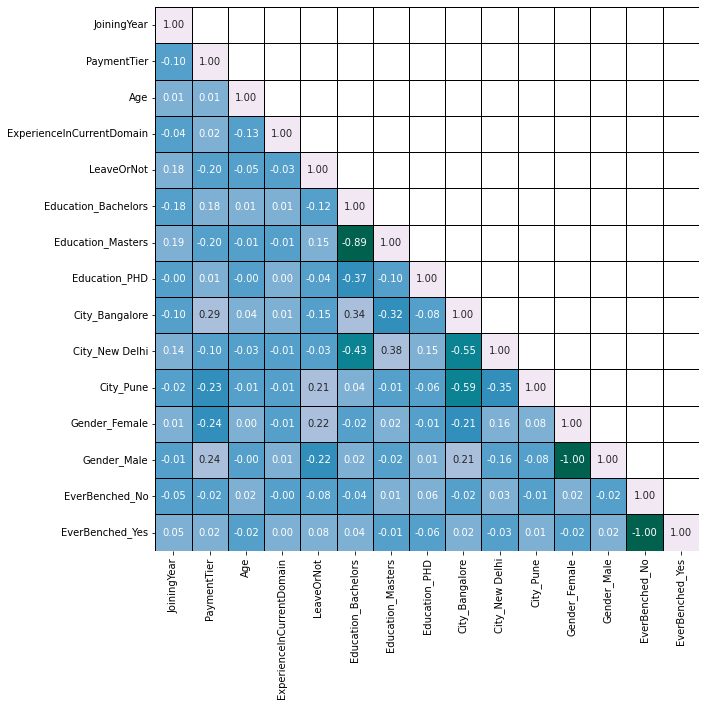

LeaveOrNot                   1.000000
JoiningYear_2018             0.395820
PaymentTier_2                0.266426
Gender_Female                0.220701
City_Pune                    0.206264
Education_Masters            0.145801
EverBenched_Yes              0.078438
JoiningYear_2015             0.059857
Age_25                       0.051053
Age_24                       0.033853
Age_32                       0.023464
Age_27                       0.014708
PaymentTier_1                0.011065
Age_22                       0.009533
Age_35                       0.007628
Age_30                       0.002878
Age_26                       0.001581
Age_23                      -0.002263
Age_33                      -0.007414
Age_36                      -0.007434
JoiningYear_2013            -0.007795
Age_29                      -0.008535
Age_34                      -0.012800
Age_40                      -0.013738
Age_37                      -0.014477
Age_39                      -0.016538
Age_31      

In [72]:
# Correlation matrix

corr = normalizedEmployees.corr()

strictCorr = veryNormalizedEmployees.corr()
leaveCorr = strictCorr['LeaveOrNot'].sort_values(ascending=False)

# Cover upper part of the heatmap to make it more readable
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
corr = corr.mask(mask)

fig, ax = plt.subplots(figsize=(10, 10))

cmap = sns.color_palette(
	palette='PuBuGn_r',
	n_colors=10
)

sns.heatmap(
	data=corr,
	cmap=cmap,
	annot=True,
	fmt='.2f',
	linewidths=1,
	linecolor='black',
	cbar=False,
	square=True
)

plt.show()
leaveCorr

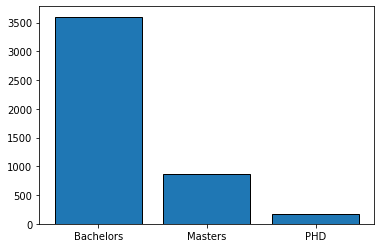

Bachelors represent ~77.39% of all employees.


In [73]:
# Distribution of employees per `Education`

labels, counts = np.unique(
	employees['Education'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topEducationalTitle = labels[np.argmax(counts)]
topEducationalTitlePercent = round(counts.max() / len(employees) * 100, 2)

print(f'{topEducationalTitle} represent ~{topEducationalTitlePercent}% of all employees.')

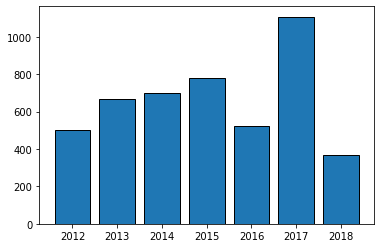

Majority of employees joined in 2017 year.


In [74]:
# Distribution of employees per `JoiningYear`

labels, counts = np.unique(
	employees['JoiningYear'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostOftenAppearingJoiningYear = labels[np.argmax(counts)]

print(f'Majority of employees joined in {mostOftenAppearingJoiningYear} year.')

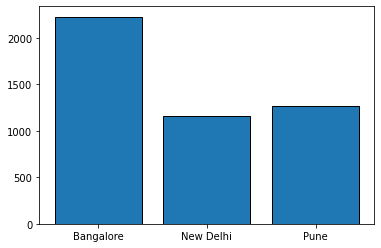

The biggest workforce is based in Bangalore


In [75]:
# Distribution of employees per `City`

labels, counts = np.unique(
	employees['City'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostPopularCity = labels[np.argmax(counts)]

print(f'The biggest workforce is based in {mostPopularCity}')

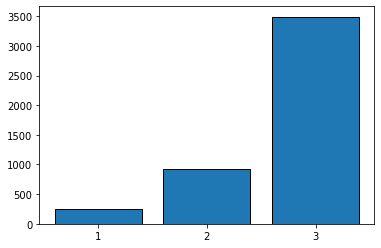

Most of the employees are in the 3rd payment tier.


In [76]:
# Distribution of employees per `PaymentTier`

labels, counts = np.unique(
	employees['PaymentTier'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

paymentTier = labels[np.argmax(counts)]

if paymentTier == 1:
	suffix = 'st'
elif paymentTier == 2:
	suffix = 'nd'
else:
	suffix = 'rd'

print(f'Most of the employees are in the {paymentTier}{suffix} payment tier.')

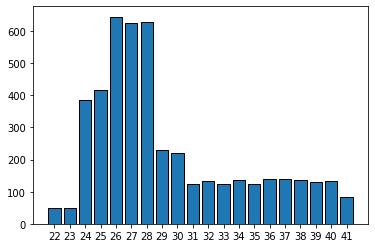

While vast majority of all employees are 24 - 30 years old, greater part of them are 26 - 28 years old.


In [77]:
# Distribution of employees per `Age`

labels, counts = np.unique(
	employees['Age'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

top3Ages = np.argpartition(counts, -3)[-3:]
top3MinAge = labels[top3Ages].min()
top3MaxAge = labels[top3Ages].max()

top7Ages = np.argpartition(counts, -7)[-7:]
top7MinAge = labels[top7Ages].min()
top7MaxAge = labels[top7Ages].max()

print(f'While vast majority of all employees are {top7MinAge} - {top7MaxAge} years old, greater part of them are {top3MinAge} - {top3MaxAge} years old.')

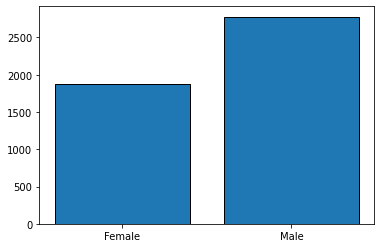

Although "Male" is a dominant gender, the predominance is not very big.


In [78]:
# Distribution of employees per `Gender`

labels, counts = np.unique(
	employees['Gender'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topGender = labels[np.argmax(counts)]

print(f'Although "{topGender}" is a dominant gender, the predominance is not very big.')

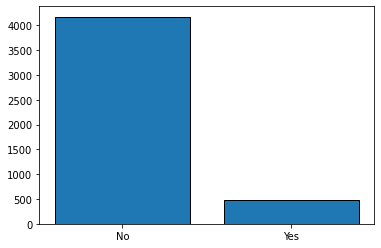

As we can see, most of the personnel has not been benched away from projects for 1 month or longer.


In [79]:
# Distribution of employees per `EverBenched`

labels, counts = np.unique(
	employees['EverBenched'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

everBenched = labels[np.argmax(counts)]

if everBenched == 'No':
	p = 'has not'
else:
	p = 'has'
	
print(f'As we can see, most of the personnel {p} been benched away from projects for 1 month or longer.')


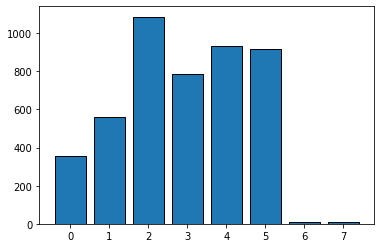

Despite the fact that major part of workers has 2 years of experience, nearly all of the employed has 0 - 5 years.
Employees having 6 - 7 years of experience are undoubtedly outnumbered.


In [80]:
# Distribution of employees per `ExperienceInCurrentDomain`

labels, counts = np.unique(
	employees['ExperienceInCurrentDomain'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

experience = labels[np.argmax(counts)]
top6Exp = np.argpartition(counts, -6)[-6:]
top6MinExp = labels[top6Exp].min()
top6MaxExp = labels[top6Exp].max()
bottom2Exp = np.argpartition(counts, 2)[:2]
bottom2MinExp = labels[bottom2Exp].min()
bottom2MaxExp = labels[bottom2Exp].max()

print(f'Despite the fact that major part of workers has {experience} years of experience, nearly all of the employed has {top6MinExp} - {top6MaxExp} years.')
print(f'Employees having {bottom2MinExp} - {bottom2MaxExp} years of experience are undoubtedly outnumbered.')

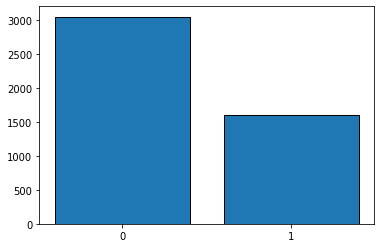

Greater number of all employees are not leaving the company in the next 2 years.


In [81]:
# Distribution of employees per `LeaveOrNot`

labels, counts = np.unique(
	employees['LeaveOrNot'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

leaveOrNot = labels[np.argmax(counts)]

print(f'Greater number of all employees are {"not" if leaveOrNot == 0 else ""} leaving the company in the next 2 years.')

## Models

In [82]:
# `LeaveOrNot` data
leaveOrNot_Data = normalizedEmployees.drop('LeaveOrNot', axis=1).to_numpy()
leaveOrNot_Data

array([[2017,    3,   34, ...,    1,    1,    0],
       [2013,    1,   28, ...,    0,    1,    0],
       [2014,    3,   38, ...,    0,    1,    0],
       ...,
       [2018,    3,   27, ...,    1,    1,    0],
       [2012,    3,   30, ...,    1,    0,    1],
       [2015,    3,   33, ...,    1,    0,    1]], dtype=int16)

In [83]:
# Labels collection

labels_Data = normalizedEmployees.loc[:, 'LeaveOrNot'].to_numpy()
labels_Data

array([0, 1, 0, ..., 1, 0, 0], dtype=int8)

In [84]:
# Division into train and test data

X_train, X_test, y_train, y_test = train_test_split(
	leaveOrNot_Data, 
	labels_Data, 
	test_size=0.2, 
	random_state=42
)

In [85]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # Train model
    classifier.fit(feature_vector_train, label)
    
    # Generate models' predictions for test data
    predictions = classifier.predict(feature_vector_valid)
    
    # Evaluate the model basing on test data
    scores = list(
        metrics.precision_recall_fscore_support(
            y_test, 
            predictions, 
            average='weighted', 
            labels=np.unique(predictions)
        )
    )

    score_vals = [
        scores[0],
        scores[1],
        scores[2]
    ]
    score_vals.append(metrics.accuracy_score(predictions,y_test))
    return score_vals


In [86]:
# MODEL 1 - Logistic regression
accuracy = train_model(
	linear_model.LogisticRegression(
		max_iter=1000
	), 
	X_train, 
	y_train, 
	X_test
)
accuracy_compare = {'LR': accuracy}
print ("Linear Regression: ", accuracy)

Linear Regression:  [0.7355717446635116, 0.7432867883995704, 0.7279652463055583, 0.7432867883995704]


In [87]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(
	svm.SVC(), 
	X_train, 
	y_train, 
	X_test
)
accuracy_compare['SVM'] = accuracy
print ("Support Vector Model" , accuracy)

Support Vector Model [0.6552094522019334, 1.0, 0.791693705386113, 0.6552094522019334]


In [88]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(
	ensemble.RandomForestClassifier(), 
	X_train, 
	y_train, 
	X_test
)
accuracy_compare['RF'] = accuracy
print ("Random Forest Classifier: ", accuracy)

Random Forest Classifier:  [0.8500196004445585, 0.8517722878625135, 0.8497786317332039, 0.8517722878625135]


<AxesSubplot:>

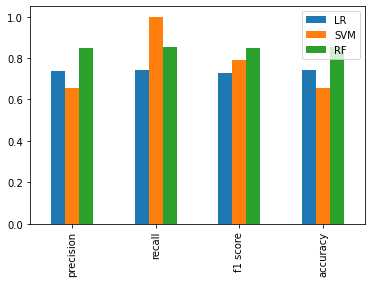

In [89]:
compareCleanModels = pd.DataFrame(
	accuracy_compare, 
	index = ['precision', 'recall', 'f1 score', 'accuracy']
)
compareCleanModels.plot(kind='bar')

In [90]:
# Corrective action - use of a neural network

# MODEL 4 - neural network
mlp = MLPClassifier(
	hidden_layer_sizes=(10, 10, 10), 
	max_iter=1000
)
accuracy = train_model(
	mlp, 
	X_train, 
	y_train, 
	X_test
)
accuracy_compare['Neural network'] = accuracy
print ("Neural network" , accuracy)

Neural network [0.6552094522019334, 1.0, 0.791693705386113, 0.6552094522019334]


<AxesSubplot:>

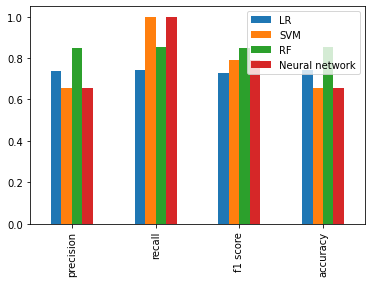

In [91]:
compareCleanModelsNN = pd.DataFrame(
	accuracy_compare, 
	index = ['precision', 'recall', 'f1 score', 'accuracy']
)
compareCleanModelsNN.plot(kind='bar')

## Corrective actions - Hyperparameters

In [92]:
# MODEL 5 - Logistic regression
accuracy = train_model(
	linear_model.LogisticRegression(
		random_state=42,
		verbose=1,
		max_iter=1000
	), 
	X_train, 
	y_train, 
	X_test
)
accuracy_compare['LR'] = accuracy
print ("Linear Regression random_state=12345, verbose=1, max_iter=1000:", accuracy)

Linear Regression random_state=12345, verbose=1, max_iter=1000: [0.7355717446635116, 0.7432867883995704, 0.7279652463055583, 0.7432867883995704]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [93]:
# Finding the best 'C' and 'gamma' values for an SVM (takes a bit longer, ~30s)

C_range = np.logspace(-2, 2, num=13, base=10.0)
gamma_range = np.logspace(-3, 3, num=13, base=10.0)
param_grid = dict(
	gamma=gamma_range, 
	C=C_range
)
cv = StratifiedShuffleSplit(
	n_splits=5, 
	test_size=0.2, 
	random_state=42
)
grid = GridSearchCV(
	svm.SVC(),
	param_grid=param_grid,
	cv=cv
)

grid.fit(X_test, y_test)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 21.54434690031882, 'gamma': 0.03162277660168379} with a score of 0.85


In [94]:
# MODEL 6 - Support Vector Machine
# Let's use the above values

accuracy = train_model(
	svm.SVC(
		C=grid.best_params_['C'],
		gamma=grid.best_params_['gamma']
	), 
	X_train, 
	y_train, 
	X_test
)

accuracy_compare['SVM'] = accuracy
print ("SVM with GridSearched 'C' and 'gamma' parameters" , accuracy)

SVM with GridSearched 'C' and 'gamma' parameters [0.8612633207341552, 0.8582169709989259, 0.85285518749479, 0.8582169709989259]


In [95]:
# MODEL 7 - Support Vector Machine
accuracy = train_model(
	svm.SVC(kernel='linear'), 
	X_train, 
	y_train, 
	X_test
)

accuracy_compare['SVM'] = accuracy
print ("SVM kernel='linear'" , accuracy)

SVM kernel='linear' [0.7488899309282737, 0.7540279269602578, 0.7381824806413483, 0.7540279269602578]


In [96]:
# MODEL 8 - Support Vector Machine
accuracy = train_model(
	svm.SVC(
		kernel='poly',
		degree=90
	), 
	X_train, 
	y_train, 
	X_test

)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='poly', degree=90" , accuracy)

SVM kernel='poly', degree=90 [0.7224805730756219, 0.7303974221267454, 0.7084252722136305, 0.7303974221267454]


<AxesSubplot:>

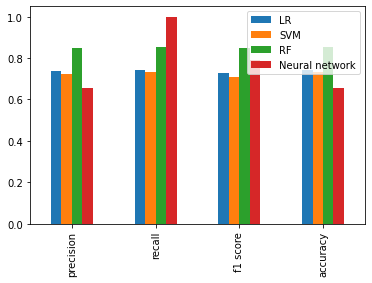

In [97]:
compareModelsWithHyperparameters = pd.DataFrame(
	accuracy_compare, 
	index = ['precision', 'recall', 'f1 score', 'accuracy']
)
compareModelsWithHyperparameters.plot(kind='bar')

## Ending analysis and summing up 

Given the dataset with employees' details and whether they leave the company in the next 2 years, we were put to task to train a model that given needed details, can predict whether an employee will leave or not.

After loading the dataset and normalizing it (for train purposes), we could plot a correlation matrix to see, how much `LeaveOrNot` column correlates with other employee details. The results of that are as following:

`LeaveOrNot` correlates the most with:
- *2018* as the `JoiningYear`,
- *2nd* `PaymentTier`,
- *Female* part of the employees,
- workforce in the city of *Pune*,
- *Master's* degree.

Less significant, yet important. If an employee:
- *was ever benched* from the project,
- joined in *2015*, 
- is *25* years old,

they are more likely to leave.

There are some more parameters that may slightly affect their decision, although compared to the above, they are not really significant.

Afterwards there is some exploratory data analysis with plots, to help visualize different relations in columns.

-----

At the very end it was time to create and train models that could predict employee's notice in the next 2 years.

Firstly, the dataset has been divided into train and test data.
Then, 3 bare models were trained:
- **Logistic Regression**
- **Support Vector Machine**
- **Random Forest Tree**

***[Comparison of those 3 bare models - 1st plot]***

Next, some corrective actions were made - *Neural Network (using MLPClassifier)* came into use.

***[Comparison of those 3 bare models and Neural Network - 2nd plot]***

Trying to boost scores up a bit, hyperparameters tuning was used.

For the first shot, we used *Logistic Regression with (random_state=42, verbose=1, max_iter=1000)*.

Then, there was an attempt to find *'C'* and *'gamma'* parameters best values to upgrade the SVM.
After finding some values, we trained *Support Vector Machine with (C = 21.54434690031882, gamma = 0.03162277660168379)*

Thirdly, *SVM* was trained with a different kernel *(kernel = 'linear')* and scores already jumped up a bit.

Last but not least - *SVM* with *(kernel = 'poly', degree = 90)* was used.

***[Comparison of those 3 fine-tuned models and Neural Network - 3rd plot]***

<AxesSubplot:>

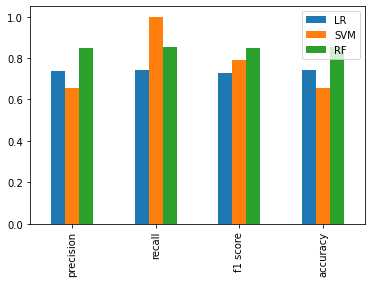

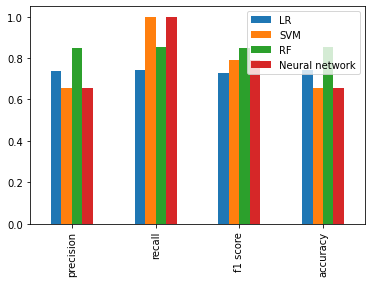

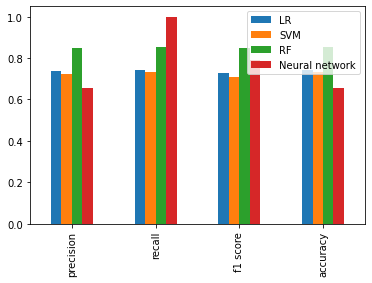

In [98]:
compareCleanModels.plot(kind='bar')
compareCleanModelsNN.plot(kind='bar')
compareModelsWithHyperparameters.plot(kind='bar')

We can clearly see that in the end, **"Random Forest"** tuned with hyperparameters is beating other models *fair'n'square*, having an impressive **~85%** in every category, more than 10% (!) than others.

Authors: Jakub Gawronski, Kamil Bejma